In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("dark")
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')

train_df= pd.read_csv('/content/drive/My Drive/Dataset/train.csv')
test_df= pd.read_csv('/content/drive/My Drive/Dataset/test.csv')
train_df

Mounted at /content/drive


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.shape

(28000, 784)

In [5]:
labels = train_df['label']
labels.shape

(42000,)

In [6]:
train_df_for_pca = train_df.drop(['label'], axis=1)
train_df_for_pca.shape

(42000, 784)

In [7]:
standardized_data = StandardScaler().fit_transform(train_df_for_pca)
print(standardized_data.shape)

(42000, 784)


In [8]:
sample_data = standardized_data
# Matrix multiplication with numpy
covariance_matrix = np.matmul(sample_data.T, sample_data)
# As the sample_data has 784 columns, so the co-variance matrix shape
# should be 784 * 784
print('Shape of Co-variance matrix = ', covariance_matrix.shape)

Shape of Co-variance matrix =  (784, 784)


In [9]:
from scipy.linalg import eigh
eigenvalues, eigenvectors = eigh(covariance_matrix, eigvals=(782, 783) )
print('Shape of Eigenvectors ', eigenvectors.shape )

Shape of Eigenvectors  (784, 2)


In [10]:
eigenvectors = eigenvectors.T

In [11]:
projected_vec = np.matmul(eigenvectors, sample_data.T)
projected_vec.shape

(2, 42000)

In [12]:
projected_vec = np.vstack((projected_vec, labels)).T
projected_vec.shape

(42000, 3)

In [13]:
pca_dataframe = pd.DataFrame(data=projected_vec, columns=('1st_principal_comp', "2nd_principal_comp", 'labels') )

In [14]:
pca_dataframe.head()

,1st_principal_comp,2nd_principal_comp,labels
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


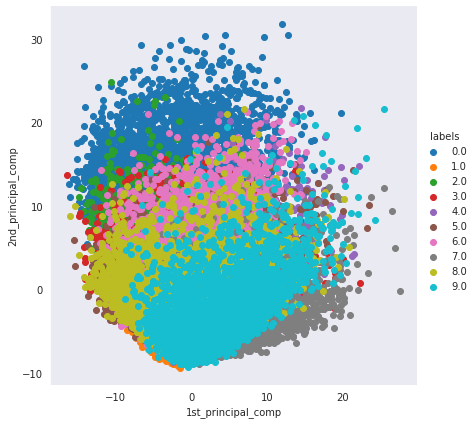

In [15]:
sns.FacetGrid(pca_dataframe, hue='labels', size=6).map(plt.scatter, '1st_principal_comp', "2nd_principal_comp").add_legend()
plt.show()

In [16]:
pca = decomposition.PCA()
pca.n_components = 2
pca_data_with_scikit = pca.fit_transform(standardized_data)
pca_data_with_scikit.shape

(42000, 2)

In [17]:
pca_data_with_scikit = np.vstack((pca_data_with_scikit.T, labels)).T
pca_data_with_scikit.shape

(42000, 3)

In [18]:
df_PCA_scikit = pd.DataFrame(data=pca_data_with_scikit, columns=('f1_PC', 'f2_PC', 'labels'))
df_PCA_scikit.head()

,f1_PC,f2_PC,labels
0,-5.140517,-5.227217,1.0
1,19.292297,6.032529,0.0
2,-7.644484,-1.705679,1.0
3,-0.474150,5.837041,4.0
4,26.559567,6.024604,0.0


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


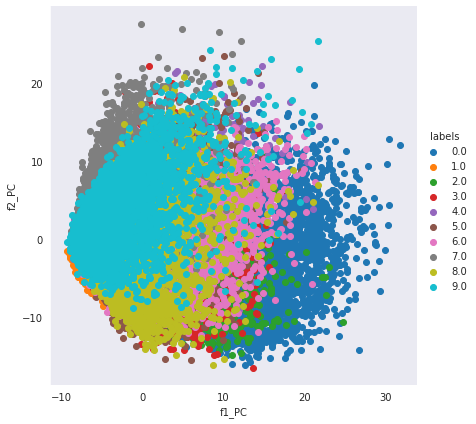

In [19]:
sns.FacetGrid(df_PCA_scikit, hue='labels', size=6).map(plt.scatter, 'f1_PC', 'f2_PC').add_legend()
plt.show()

In [20]:
print('Shape of standardized_data ', standardized_data.shape)

pca.n_components = 784
pca_data_scikit_2 = pca.fit_transform(standardized_data)
percent_variance_retained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cumulative_variance_retained = np.cumsum(percent_variance_retained)

Shape of standardized_data  (42000, 784)


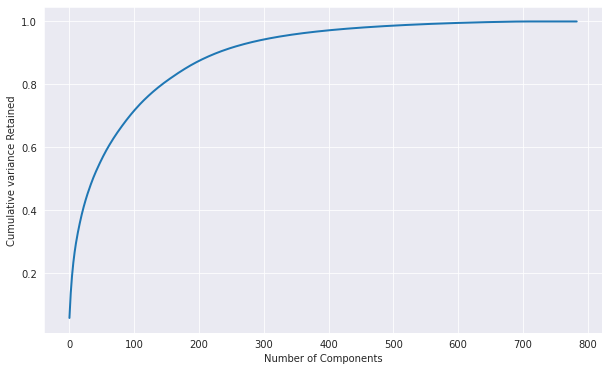

In [21]:
plt.figure(1, figsize=(10, 6))
plt.clf()
plt.plot(cumulative_variance_retained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance Retained')
plt.show()

In [22]:
from sklearn.manifold import TSNE
model = TSNE(n_components=3 ,init='pca')

In [ ]:
reduced = model.fit_transform(train_df.drop('label',axis=1))

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [ ]:
model.kl_divergence_

In [ ]:
import plotly.express as pex
pex.scatter(x=reduced[:,0],y=reduced[:,1],color=train_df['label'], color_continuous_scale=pex.colors.sequential.Viridis)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adadelta
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
mnist_train_label = train_df.loc[:, "label"]

In [ ]:
mnist_train_df = train_df.loc[:, "pixel0":]
mnist_train_df 

In [ ]:
mnist_train_array = np.array(mnist_train_df)
print(mnist_train_array)

In [ ]:
mnist_train_label_array = np.array(mnist_train_label)
print(mnist_train_label_array)